In [1]:
import pandas as pd
import numpy as np
import keras
import glob
import os
import random
import pickle
import seaborn as sns
%pylab inline
sns.set()
from IPython.display import SVG
from skimage import io
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.utils import to_categorical
from PIL import Image
import tensorflow as tf
# from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, InputLayer
from sklearn.metrics import accuracy_score
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import ZeroPadding2D, Dropout
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression

Populating the interactive namespace from numpy and matplotlib


C:\Users\mitch\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
with open('X_train', 'rb') as f:
    X_train = pickle.load(f)
with open('X_test', 'rb') as f:
    X_test = pickle.load(f)
with open('y_train', 'rb') as f:
    y_train = pickle.load(f)
with open('y_test', 'rb') as f:
    y_test = pickle.load(f)

In [3]:
X_train_flat = []
for k in range(len(X_train)):
    X_train_flat.append([item for sublist in X_train[k] for item in sublist])

In [4]:
X_train_flatter = []
for k in range(len(X_train)):
    X_train_flatter.append([item for sublist in X_train_flat[k] for item in sublist])

In [5]:
X_train_flatter = np.array(X_train_flatter)

In [6]:
X_test_flat = []
for k in range(len(X_test)):
    X_test_flat.append([item for sublist in X_test[k] for item in sublist])

In [7]:
X_test_flatter = []
for k in range(len(X_test)):
    X_test_flatter.append([item for sublist in X_test_flat[k] for item in sublist])

In [8]:
X_test_flatter = np.array(X_test_flatter)

In [9]:
y_train_cat = []
for y in y_train:
    for k in range(len(y)):
        if y[k] == 1:
            y_train_cat.append(k)
            break

In [10]:
y_test_cat = []
for y in y_test:
    for k in range(len(y)):
        if y[k] == 1:
            y_test_cat.append(k)
            break

In [11]:
y_train_cat.count(2)
# 0 = Healthy
# 1 = Blight
# 2 = Rust
# 3 = Grey Spot

1054

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_flatter)
X_test = scaler.transform(X_test_flatter)

In [13]:
p=['Black', 'Red', 'Blue', 'Green']

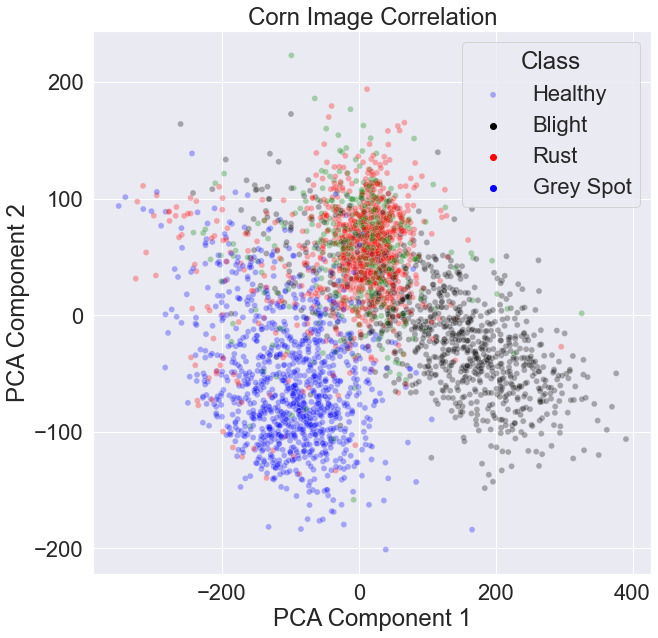

In [14]:
pca = PCA(n_components=2)

X_train_2PC = pca.fit_transform(X_train)
X_test_2PC = pca.transform(X_test)

figsize(10, 10)
sns.set(font_scale=2)

sns.scatterplot(x=X_train_2PC[:, 0], y=X_train_2PC[:, 1],
                hue=y_train_cat, alpha=.3,
                palette=p)

plt.legend(title='Class', loc='upper right', labels=['Healthy', 'Blight', 'Rust', 'Grey Spot'])

xlabel("PCA Component 1")
ylabel("PCA Component 2")
title("Corn Image Correlation");

In [15]:
def evr (array):
    _sum = 0
    for element in array:
        _sum += element
    return _sum

evr(pca.explained_variance_ratio_)

0.3837324529886246

C:\Users\mitch\AppData\Local\Temp/ipykernel_30012/975138396.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection='3d')
No handles with labels found to put in legend.


Text(0.5, 0.92, 'SWOOD plotted with PCA')

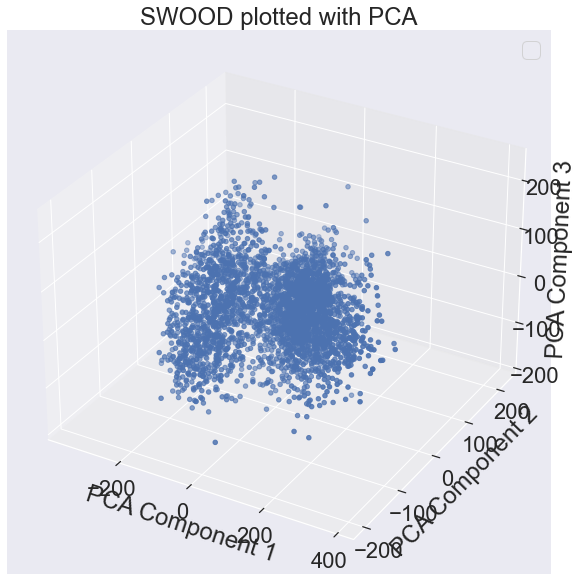

In [16]:
pca = PCA(n_components=3)

X_train_3PC = pca.fit_transform(X_train)
X_test_3PC = pca.transform(X_test)


fig = plt.figure(figsize=(10,10))
axes = fig.gca(projection='3d')

axes.scatter3D(X_train_3PC[:, 0], X_train_3PC[:, 1], X_train_3PC[:, 2])

# plt.legend(title='Class', loc='upper right', labels=['C', 'O', 'R', 'N'])

axes.legend()

axes.set_xlabel("PCA Component 1")
axes.set_ylabel("PCA Component 2")
axes.set_zlabel("PCA Component 3")
axes.set_title("SWOOD plotted with PCA")

In [17]:
# Using Only 2 Features
lr = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr.fit(X_train_2PC, y_train_cat)
lr.score(X_test_2PC, y_test_cat)

0.7004773269689738

In [18]:
# Using All Features - lbfgs
lr = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr.fit(X_train, y_train_cat)
lr.score(X_test, y_test_cat)

C:\Users\mitch\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.801909307875895

In [19]:
# Using All Features - saga
lr = LogisticRegression(multi_class = 'multinomial', solver = 'saga')
lr.fit(X_train, y_train_cat)
lr.score(X_test, y_test_cat)

C:\Users\mitch\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.8078758949880668

In [20]:
# Using All Features - sag
lr = LogisticRegression(multi_class = 'multinomial', solver = 'sag')
lr.fit(X_train, y_train_cat)
lr.score(X_test, y_test_cat)

C:\Users\mitch\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.8042959427207638

In [21]:
# Using All Features - newton-cg
lr = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
lr.fit(X_train, y_train_cat)
lr.score(X_test, y_test_cat)

KeyboardInterrupt: 